In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# Loading and taking a look at the dataset
data = pd.read_csv('./breast_cancer_data.csv')
data.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [15]:
# Extracting features and targets
x = data.loc[:, ~data.columns.isin(['diagnosis'])].values
y = data['diagnosis']

# Normalizing features using the MinMaxScaler
scaler = MinMaxScaler()
x_normalized = scaler.fit_transform(x)

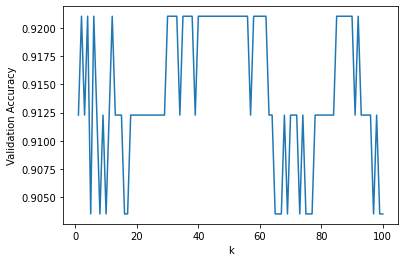

Max accuracy is 0.9210526315789473 when k = 2


In [16]:
# Train-test splitting
x_train, x_test, y_train, y_test = train_test_split( x_normalized, y, \
    test_size=0.2, random_state=100 )

# Classifing for a range of k values in order to check which k is best.
k_list = range(1,101)
accuracies = []
for k in k_list:
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit( x_train, y_train )
  accuracies.append(classifier.score(x_test, y_test))

# Plotting k vs Validation Accuracy
plt.plot(k_list,accuracies)
plt.xlabel("k")
plt.ylabel("Validation Accuracy")
plt.show()

# Grabbing the best value for k
max_accuracy = max(accuracies)
max_accuracy_index = accuracies.index(max_accuracy)
best_k = k_list[max_accuracy_index]
print(f"Max accuracy is {max_accuracy} when k = {best_k}")

In [134]:
# Retraining the model with the best k value
classifier = KNeighborsClassifier( n_neighbors = best_k )
classifier.fit( x_train, y_train )
accuracy_pct = classifier.score( x_test, y_test ) * 100

# Generating a random test case using the dataset values
features = [k for k in data.keys() if k != 'diagnosis']
test = np.array( [ np.random.uniform( data.min()[f], data.max()[f] ) for f in features ] )

# Printing out the test case
print("Test case:")
print( dict( zip( features, test ) ) )
print()

# Normalizing the test case and predicting the result class
test_normalized = scaler.transform( test.reshape( -1, len(test) ) )
test_diagnosis = classifier.predict( test_normalized )

# Printing out the test result
test_diagnosis_label = ["NEGATIVE", "POSITIVE"]
print(f"This test indicates {test_diagnosis_label[test_diagnosis[0]]} \
        for breast cancer with {accuracy_pct:.2f}% accuracy.")



Test case:
{'mean_radius': 26.838952816253354, 'mean_texture': 36.41063742263113, 'mean_perimeter': 82.36257431319116, 'mean_area': 503.2687658682009, 'mean_smoothness': 0.06746102762266232}

This test indicates NEGATIVE         for breast cancer with 92.11% accuracy.
